1e-10


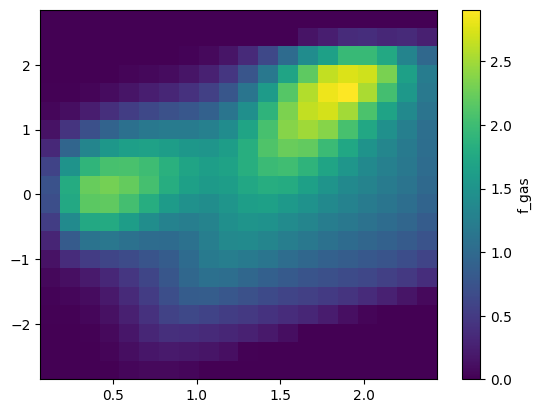

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import h5py
f=h5py.File("/Users/24756376/data/Flamingo/L1000N1800/2d_fgas_H.hdf5",'r')
hdm=np.array(f['Ndm'])
hg=np.array(f['Ng'])
bin=np.array(f['bin'])
binv=np.array(f['binv'])
hg_T=np.array(f['Ng_T'])
#hg_X=np.array(f['Ng_Xray'])
hg_S=np.array(f['Ng_S'])
f.close()
f=h5py.File("/Users/24756376/data/Flamingo/L1000N1800_NoCool/c_z_half.hdf5",'r')

zh_ad=np.array(f["z_half"])
f.close()
f=h5py.File("/Users/24756376/data/Flamingo/L1000N1800/c_z_half.hdf5",'r')

zh=np.array(f["z_half"])
f.close()
f=h5py.File("/Users/24756376/data/Flamingo/L1000N1800_NoCool/2d_fgas_H.hdf5",'r')
hdm_ad=np.array(f['Ndm'])
hg_ad=np.array(f['Ng'])
hg_T_ad=np.array(f['Ng_T'])
#hg_X_ad=np.array(f['Ng_Xray'])
hg_S_ad=np.array(f['Ng_S'])
f.close()
f=h5py.File('/Users/24756376/data/Flamingo/L1000N1800_NoCool/halos_ranked.hdf5','r')

r50=np.array(f["r50"])
r50=r50[r50>0]
f.close()

hdm+=10**-10
hdm_ad+=10**-10
#hg=hg+10**-10
#hg_ad=hg_ad+10**-10
f_ad=hg_ad*8.56/(hdm_ad*45.2+hg_ad*8.56)/(0.0494/0.316)
f=hg*8.56/(hdm*45.2+hg*8.56)/(0.0494/0.316)

print(np.min(hdm_ad))
v_m=np.percentile(f,50,axis=0)
v_ad_m=np.percentile(f_ad,50,axis=0)
plt.figure()
plt.imshow(v_m.T,origin='lower',extent=[bin[0],bin[-1],binv[0],binv[-1]],aspect='auto',)
plt.colorbar(label='f_gas')


-1.0 1.4000000000000001
[0.89036745 1.27820389 1.2038845  1.08916325 0.953505   0.85831033
 0.87763059 0.91326687 1.11743761 1.29093956 1.00554773 1.13668822
 1.23576542 1.17444574 1.22374429 1.17721261 1.02033896 1.04810473
 1.08654803 1.0772454 ]
659685516.0 799260106.0


Text(0, 0.5, 'medium T ')

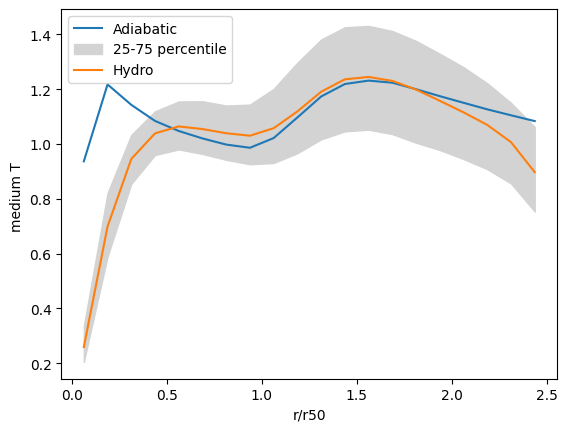

In [32]:
bins=np.linspace(0,2,21)
hist=np.sum(hg_ad[(zh_ad>-2)*(zh_ad<3)],axis=2)*8.56/(np.sum(hdm_ad[(zh_ad>-2)*(zh_ad<3)],axis=2)*45.2+np.sum(hg_ad[(zh_ad>-2)*(zh_ad<3)],axis=2)*8.56)/(0.0494/0.316)
print(np.min(zh),np.max(zh))
per=np.percentile(hist,[25,50,75],axis=0)
fig=plt.figure()
ax=fig.add_subplot(111)
print(hist[0])
ax.plot(bin,per[1],label='Adiabatic')
hist=np.sum(hg[(zh>-2)*(zh<3)],axis=2)*8.56/(np.sum(hdm[(zh>-2)*(zh<3)],axis=2)*45.2+np.sum(hg[(zh>-2)*(zh<3)],axis=2)*8.56)/(0.0494/0.316)
per=np.percentile(hist,[25,50,75],axis=0)
ax.fill_between(bin,per[0],per[2],color='lightgrey',label='25-75 percentile')

ax.plot(bin,per[1],label='Hydro')
ax.legend()
#ax.set_yscale('log')
print(np.sum(hg),np.sum(hg_ad))
ax.set_xlabel('r/r50')
ax.set_ylabel('medium T ')

1601 1490


Text(0.5, 1.0, 'Medium entropy profile of M>10^14 halos in L1000N1800')

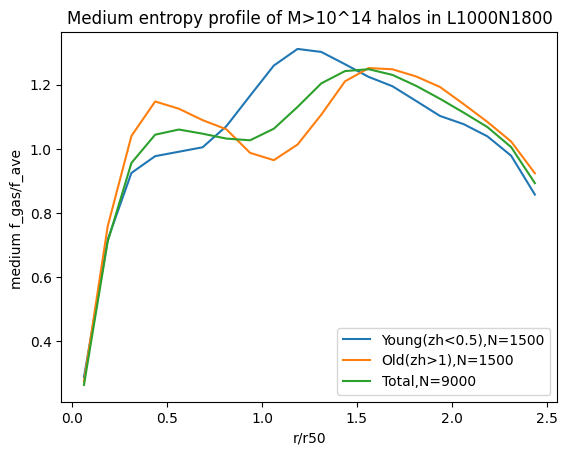

In [28]:
bins=np.linspace(0,2,21)
hist=np.sum(hg[(zh>0)*(zh<0.5)],axis=2)*8.56/(np.sum(hdm[(zh>0)*(zh<0.5)],axis=2)*45.2+np.sum(hg[(zh>0)*(zh<0.5)],axis=2)*8.56)/(0.0494/0.316)

per=np.percentile(hist,[25,50,75],axis=0)
fig=plt.figure()
ax=fig.add_subplot(111)

ax.plot(bin,per[1],label='Young(zh<0.5),N=1500')
hist=np.sum(hg[(zh>0)*(zh>1)],axis=2)*8.56/(np.sum(hdm[(zh>0)*(zh>1)],axis=2)*45.2+np.sum(hg[(zh>0)*(zh>1)],axis=2)*8.56)/(0.0494/0.316)

per=np.percentile(hist,[25,50,75],axis=0)
ax.plot(bin,per[1],label='Old(zh>1),N=1500')
hist=np.sum(hg[(zh>0)],axis=2)*8.56/(np.sum(hdm[(zh>0)],axis=2)*45.2+np.sum(hg[(zh>0)],axis=2)*8.56)/(0.0494/0.316)
print(len(zh[(zh>0)*(zh<0.5)]),len(zh[(zh>0)*(zh>1)]))
per=np.percentile(hist,[25,50,75],axis=0)
ax.plot(bin,per[1],label='Total,N=9000')
ax.legend()
ax.set_xlabel('r/r50')
ax.set_ylabel('medium f_gas/f_ave ')
ax.set_title('Medium entropy profile of M>10^14 halos in L1000N1800')

1601 1490


Text(0.5, 1.0, 'Medium entropy profile of M>10^14 halos in L1000N1800 ')

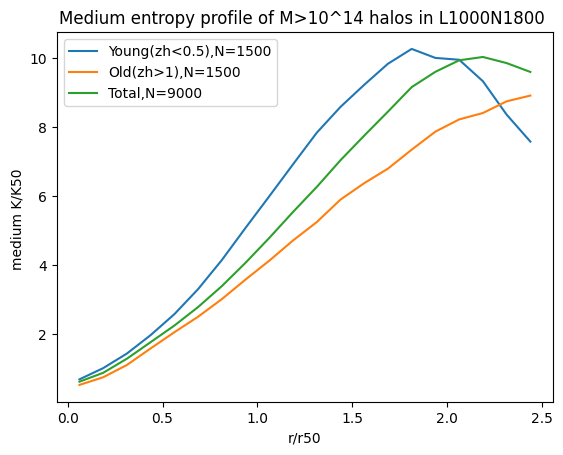

In [32]:
bins=np.linspace(0,2,21)
hist=np.sum(hg_S[(zh>0)*(zh<0.5)],axis=2)#*8.56/(np.sum(hdm[(zh>0)*(zh<0.3)],axis=2)*45.2+np.sum(hg[(zh>0)*(zh<0.3)],axis=2)*8.56)/(0.0494/0.316)

per=np.percentile(hist,[25,50,75],axis=0)
fig=plt.figure()
ax=fig.add_subplot(111)

ax.plot(bin,per[1],label='Young(zh<0.5),N=1500')
hist=np.sum(hg_S[(zh>0)*(zh>1)],axis=2)#*8.56/(np.sum(hdm[(zh>0)*(zh>1.2)],axis=2)*45.2+np.sum(hg[(zh>0)*(zh>1.2)],axis=2)*8.56)/(0.0494/0.316)

per=np.percentile(hist,[25,50,75],axis=0)
ax.plot(bin,per[1],label='Old(zh>1),N=1500')
hist=np.sum(hg_S[(zh>0)],axis=2)#*8.56/(np.sum(hdm[(zh>0)*(zh>1.2)],axis=2)*45.2+np.sum(hg[(zh>0)*(zh>1.2)],axis=2)*8.56)/(0.0494/0.316)
print(len(zh[(zh>0)*(zh<0.5)]),len(zh[(zh>0)*(zh>1)]))
per=np.percentile(hist,[25,50,75],axis=0)
ax.plot(bin,per[1],label='Total,N=9000')
ax.legend()
ax.set_xlabel('r/r50')
ax.set_ylabel('medium K/K50 ')
ax.set_title('Medium entropy profile of M>10^14 halos in L1000N1800 ')

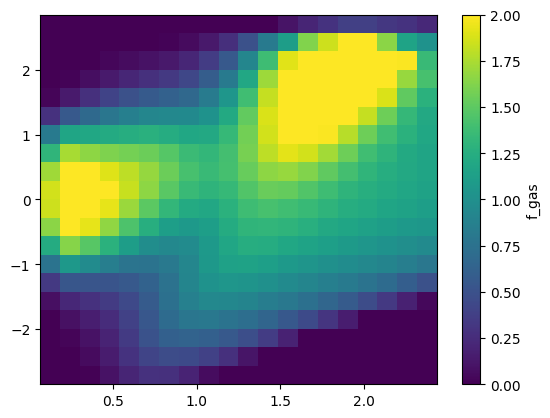

In [2]:
plt.figure()
plt.imshow(v_ad_m.T,origin='lower',extent=[bin[0],bin[-1],binv[0],binv[-1]],vmin=0,vmax=2,aspect='auto')
plt.colorbar(label='f_gas')

561097256.0 681800444.0


Text(0.5, 1.0, 'Gas Number Density Profile(Histogram/4pi r^2 dr, Medium of all halos)')

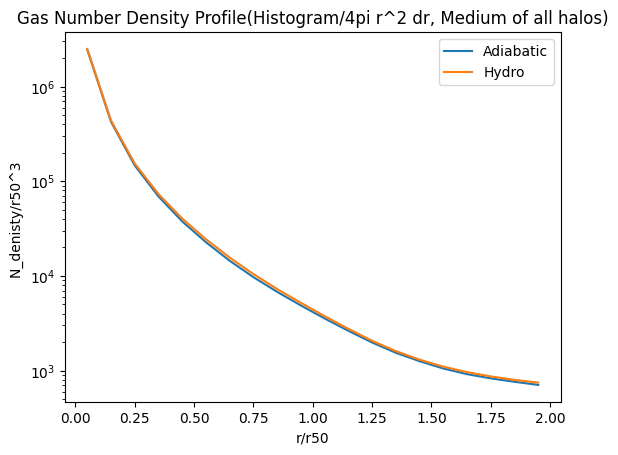

In [133]:
bins=np.linspace(0,2,21)
hist=np.sum(hdm_ad,axis=2)#*8.56/(np.sum(hdm_ad,axis=2)*45.2+np.sum(hg_ad,axis=2)*8.56)/(0.0494/0.316)

per=np.percentile(hist,[25,50,75],axis=0)
fig=plt.figure()
ax=fig.add_subplot(111)
#ax.fill_between(bin,per[0],per[2],color='lightgrey',label='25-75 percentile')
ax.plot(bin,per[1]/(bins[1:]**3-bins[:-1]**3)/(bins[1]-bins[0])/4/np.pi,label='Adiabatic')
hist=np.sum(hdm,axis=2)#*8.56/(np.sum(hdm,axis=2)*45.2+np.sum(hg,axis=2)*8.56)/(0.0494/0.316)
per=np.percentile(hist,[25,50,75],axis=0)
#ax.fill_between(bin,per[0],per[2],color='lightgrey',label='25-75 percentile')

ax.plot(bin,per[1]/(bins[1:]**3-bins[:-1]**3)/(bins[1]-bins[0])/4/np.pi,label='Hydro')
ax.legend()
ax.set_yscale('log')
print(np.sum(hg),np.sum(hg_ad))
ax.set_xlabel('r/r50')
ax.set_ylabel('N_denisty/r50^3 ')
ax.set_title('Gas Number Density Profile(Histogram/4pi r^2 dr, Medium of all halos)')


[0.05 0.15 0.25 0.35 0.45 0.55 0.65 0.75 0.85 0.95 1.05 1.15 1.25 1.35
 1.45 1.55 1.65 1.75 1.85 1.95] [0.69494538 0.95473801 1.03237998 1.05764432 1.06190991 1.0565352
 1.04646336 1.03409461 1.02067953 1.00689987 0.99313687 0.97960522
 0.96642379 0.95365502 0.94132743 0.92944906 0.9180156  0.9070154
 0.89643264 0.88624928]


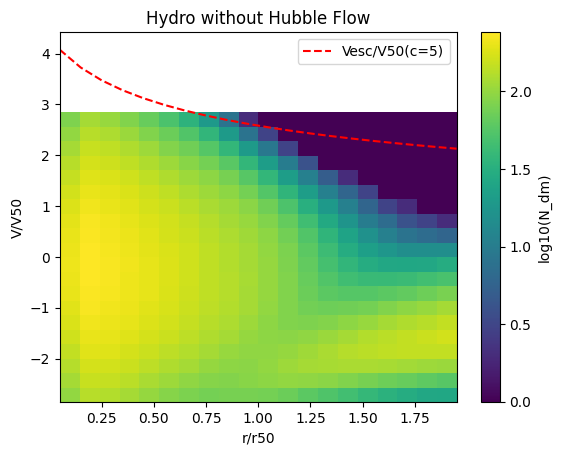

In [96]:
def F(x):
    return np.log(1+x)-x/(1+x)
dm=np.percentile(hdm,50,axis=0)#-np.percentile(f,25,axis=0)
dm_ad=np.percentile(hdm_ad,50,axis=0)#-np.percentile(f_ad,25,axis=0)
plt.figure()

plt.imshow(np.log10(dm).T,origin='lower',extent=[bin[0],bin[-1],binv[0],binv[-1]],vmin=0,aspect='auto')
plt.colorbar(label='log10(N_dm)')
print(bin,np.sqrt(F(5*bin)/F(5)/bin))
plt.xlabel('r/r50')
plt.ylabel('V/V50')
plt.title("Hydro without Hubble Flow")
plt.plot(bin,1.93*np.sqrt(np.log(1+bin*5)/bin),'r--',label='Vesc/V50(c=5)')#escrape velocity
plt.legend()
#plt.plot(bin,np.sqrt(F(5*bin)/F(5)/bin),'r--',label='Vcir/V50(c=5)')#escrape velocity

/var/folders/3t/dt29pzwn0vbbfncvrkg8lcl8g9q896/T/ipykernel_26513/2413523745.py:7: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(g_ad).T,origin='lower',extent=[bin[0],bin[-1],binv[0],binv[-1]],vmin=0,vmax=3,aspect='auto')


Text(0.5, 1.0, 'Hydro Without Hubble Flow')

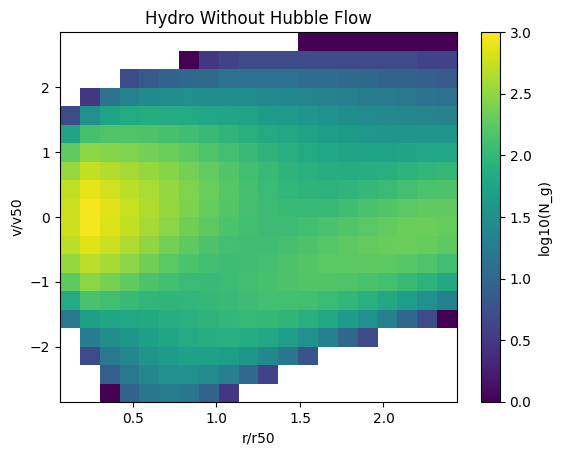

In [3]:
#hg=hg+10**-10
#hg_ad=hg_ad+10**-10
g=np.percentile(hg,50,axis=0)#-np.percentile(f,25,axis=0)
g_ad=np.percentile(hg_ad,50,axis=0)#-np.percentile(f_ad,25,axis=0)
plt.figure()

plt.imshow(np.log10(g_ad).T,origin='lower',extent=[bin[0],bin[-1],binv[0],binv[-1]],vmin=0,vmax=3,aspect='auto')
plt.colorbar(label='log10(N_g)')

plt.xlabel('r/r50')
plt.ylabel('v/v50')
plt.title('Hydro Without Hubble Flow')

In [1]:
bins=np.linspace(0,2,21)
hist=np.sum(hg_S_ad[(zh_ad>0)*(zh_ad>1.3)],axis=2)#*8.56/(np.sum(hdm_ad,axis=2)*45.2+np.sum(hg_ad,axis=2)*8.56)/(0.0494/0.316)
print(np.min(zh),np.max(zh))
per=np.percentile(hist,[25,50,75],axis=0)
fig=plt.figure()
ax=fig.add_subplot(111)
print(hist[0])
ax.plot(bin,hist[5],label='Adiabatic')
hist=np.sum(hg_S[(zh>0)*(zh>1.3)],axis=2)#*8.56/(np.sum(hdm,axis=2)*45.2+np.sum(hg,axis=2)*8.56)/(0.0494/0.316)
per=np.percentile(hist,[25,50,75],axis=0)
ax.fill_between(bin,per[0],per[2],color='lightgrey',label='25-75 percentile')

ax.plot(bin,per[1],label='Hydro')
ax.legend()
ax.set_yscale('log')
print(np.sum(hg),np.sum(hg_ad))
ax.set_xlabel('r/r50')
ax.set_ylabel('medium T ')
#ax.set_title('Gas Number Density Profile(Histogram/4pi r^2 dr, Medium of all halos)')


NameError: name 'np' is not defined

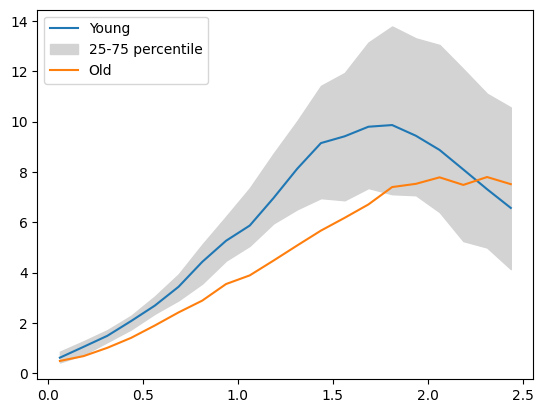

In [38]:
bins=np.linspace(0,2.5,21)
hist=np.sum(hg_S[(zh>0)*(zh<0.3)],axis=2)#*8.56/(np.sum(hdm[(zh>0)*(zh<0.3)],axis=2)*45.2+np.sum(hg[(zh>0)*(zh<0.3)],axis=2)*8.56)/(0.0494/0.316)

per=np.percentile(hist,[25,50,75],axis=0)
fig=plt.figure()
ax=fig.add_subplot(111)

ax.plot(bin,per[1],label='Young')
hist=np.sum(hg_S[(zh>0)*(zh>1.3)],axis=2)#*8.56/(np.sum(hdm[(zh>0)*(zh>1.3)],axis=2)*45.2+np.sum(hg[(zh>0)*(zh>1.3)],axis=2)*8.56)/(0.0494/0.316)
ax.fill_between(bin,per[0],per[2],color='lightgrey',label='25-75 percentile')
per=np.percentile(hist,[25,50,75],axis=0)
ax.plot(bin,per[1],label='Old')
ax.legend()

561097256.0 681800444.0


Text(0, 0.5, 'medium Lx ')

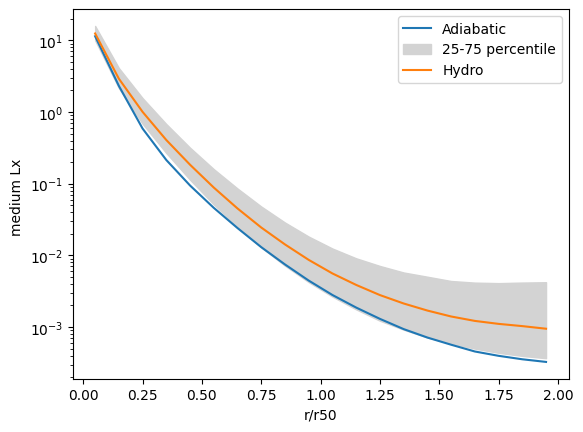

In [8]:
bins=np.linspace(0,2,21)
hist=np.sum(hg_X_ad,axis=2)#*8.56/(np.sum(hdm_ad,axis=2)*45.2+np.sum(hg_ad,axis=2)*8.56)/(0.0494/0.316)

per=np.percentile(hist,[25,50,75],axis=0)
fig=plt.figure()
ax=fig.add_subplot(111)

ax.plot(bin,per[1],label='Adiabatic')
hist=np.sum(hg_X,axis=2)#*8.56/(np.sum(hdm,axis=2)*45.2+np.sum(hg,axis=2)*8.56)/(0.0494/0.316)
per=np.percentile(hist,[25,50,75],axis=0)
ax.fill_between(bin,per[0],per[2],color='lightgrey',label='25-75 percentile')

ax.plot(bin,per[1],label='Hydro')
ax.legend()
ax.set_yscale('log')
print(np.sum(hg),np.sum(hg_ad))
ax.set_xlabel('r/r50')
ax.set_ylabel('medium Lx ')

/var/folders/3t/dt29pzwn0vbbfncvrkg8lcl8g9q896/T/ipykernel_11720/1386410987.py:5: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(g).T,origin='lower',extent=[bin[0],bin[-1],binv[0],binv[-1]],vmin=-1.25,vmax=-0.5,aspect='auto')


Text(0.5, 1.0, 'Hydro With Hubble Flow')

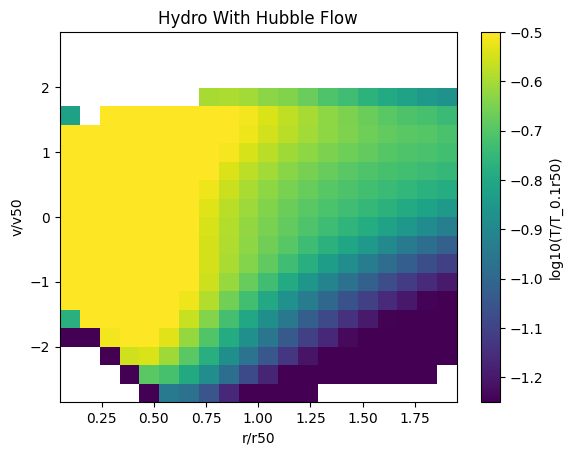

In [23]:
g=np.percentile(hg_T,50,axis=0)#-np.percentile(f,25,axis=0)
g_ad=np.percentile(hg_T_ad,50,axis=0)#-np.percentile(f_ad,25,axis=0)
plt.figure()

plt.imshow(np.log10(g).T,origin='lower',extent=[bin[0],bin[-1],binv[0],binv[-1]],vmin=-1.25,vmax=-0.5,aspect='auto')
plt.colorbar(label='log10(T/T_0.1r50)')

plt.xlabel('r/r50')
plt.ylabel('v/v50')
plt.title('Hydro With Hubble Flow')

/var/folders/3t/dt29pzwn0vbbfncvrkg8lcl8g9q896/T/ipykernel_11720/393196561.py:1: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(g_ad).T,origin='lower',extent=[bin[0],bin[-1],binv[0],binv[-1]],aspect='auto')


Text(0.5, 1.0, 'Ad With Hubble Flow')

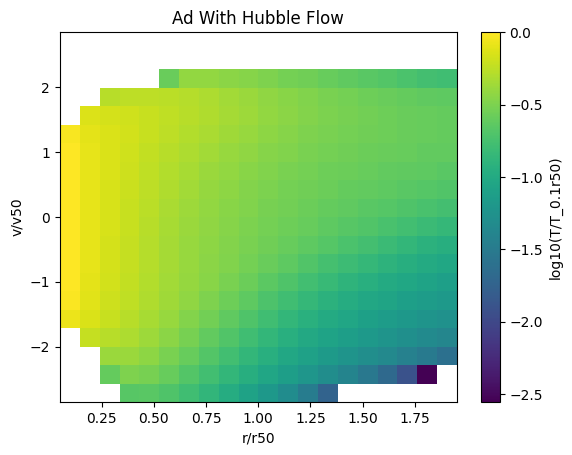

In [20]:
plt.imshow(np.log10(g_ad).T,origin='lower',extent=[bin[0],bin[-1],binv[0],binv[-1]],aspect='auto')
plt.colorbar(label='log10(T/T_0.1r50)')
plt.xlabel('r/r50')
plt.ylabel('v/v50')
plt.title('Ad With Hubble Flow')

/var/folders/3t/dt29pzwn0vbbfncvrkg8lcl8g9q896/T/ipykernel_11720/3846587611.py:5: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(gx).T,origin='lower',extent=[bin[0],bin[-1],binv[0],binv[-1]],aspect='auto')


Text(0.5, 1.0, 'Hydro With Hubble Flow')

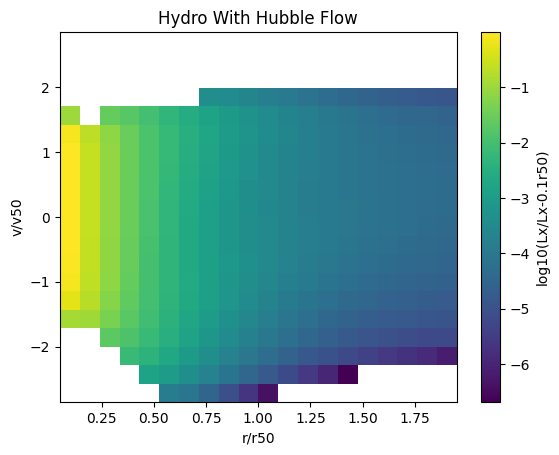

In [19]:
gx=np.percentile(hg_X,50,axis=0)#-np.percentile(f,25,axis=0)
gx_ad=np.percentile(hg_X_ad,50,axis=0)#-np.percentile(f_ad,25,axis=0)
plt.figure()

plt.imshow(np.log10(gx).T,origin='lower',extent=[bin[0],bin[-1],binv[0],binv[-1]],aspect='auto')
plt.colorbar(label='log10(Lx/Lx-0.1r50)')

plt.xlabel('r/r50')
plt.ylabel('v/v50')
plt.title('Hydro With Hubble Flow')

/var/folders/3t/dt29pzwn0vbbfncvrkg8lcl8g9q896/T/ipykernel_11720/2038386310.py:5: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(gx_ad).T,origin='lower',extent=[bin[0],bin[-1],binv[0],binv[-1]],aspect='auto')


Text(0.5, 1.0, 'Ad With Hubble Flow')

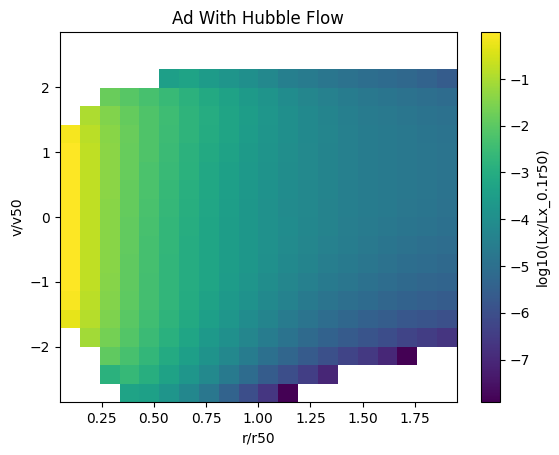

In [21]:
gx=np.percentile(hg_X,50,axis=0)#-np.percentile(f,25,axis=0)
gx_ad=np.percentile(hg_X_ad,50,axis=0)#-np.percentile(f_ad,25,axis=0)
plt.figure()

plt.imshow(np.log10(gx_ad).T,origin='lower',extent=[bin[0],bin[-1],binv[0],binv[-1]],aspect='auto')
plt.colorbar(label='log10(Lx/Lx_0.1r50)')

plt.xlabel('r/r50')
plt.ylabel('v/v50')
plt.title('Ad With Hubble Flow')

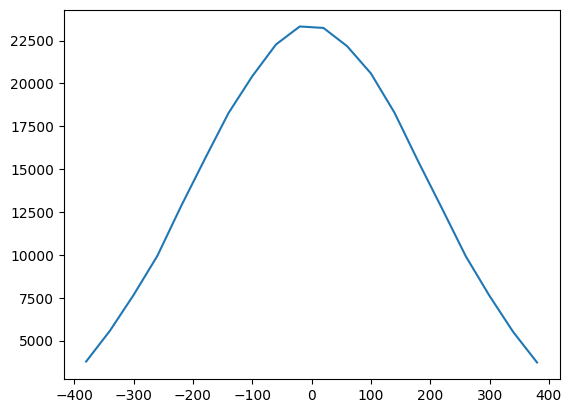

In [14]:
x=np.random.rand(557131)*2
y=np.random.rand(557131)*2
z=np.random.rand(557131)*2
r=np.sqrt(x**2+y**2+z**2)
vx=np.random.normal(loc=0,scale=200,size=557131)

vy=np.random.normal(loc=0,scale=200,size=557131)
vz=np.random.normal(loc=0,scale=200,size=557131)
v=np.sum(np.array([vx,vy,vz])*np.array([x,y,z]),axis=0)/r
bins=np.linspace(0,2,21)

binsv=np.linspace(-400,400,21)
h=np.histogram2d(r,v,bins=[bins,binsv])[0]
hist=np.sum(h,axis=0)
plt.figure()
plt.plot(binv,hist)
#plt.colorbar(label='N')

/var/folders/3t/dt29pzwn0vbbfncvrkg8lcl8g9q896/T/ipykernel_49354/4225128078.py:13: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(v_m_lowZ).T,origin='lower',extent=[bin[0],bin[-1],binv[0],binv[-1]],vmin=0,aspect='auto',)


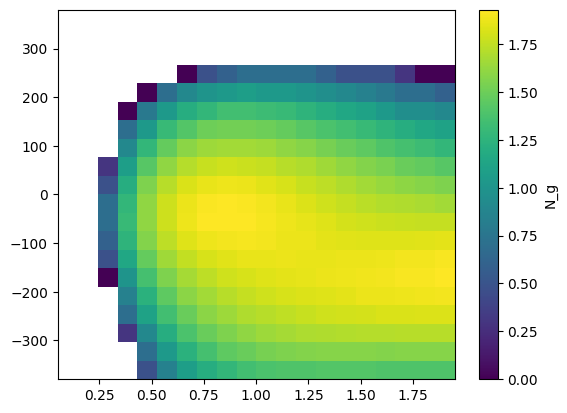

In [48]:
f=h5py.File("/Users/24756376/data/Flamingo/L1000N1800/2d_fgas_lowZ.hdf5",'r')
bin=np.array(f['bin'])
binv=np.array(f['binv'])
hg_lowZ=np.array(f['Ng'])
f.close()




v_m_lowZ=np.percentile(hg_lowZ,50,axis=0)

plt.figure()
plt.imshow(np.log10(v_m_lowZ).T,origin='lower',extent=[bin[0],bin[-1],binv[0],binv[-1]],vmin=0,aspect='auto',)
plt.colorbar(label='N_g')